In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [2]:
imdb_movies_data = pd.read_csv('/Jupyter/Temp/IMDb movies.csv', dtype={3: object}) # here we are importing a csv file from pur local storage and storing it into a variable named 'imdb_movies_data' and as it was giving a warning saying that column(3) have mixed type we specified a dtype for column(3) in the read statement
imdb_movies_data.head(2) # we print first two rows of the dataset

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [3]:
print(imdb_movies_data.columns) # it gives us list of all columns in the imported dataset this can be helpful as jupyter by-default show limited columns. we can also use 'pd.set_option('display.max_columns', None)' to show all columns
print()
print(imdb_movies_data.describe(include = 'all')) # this gives us some basic information about the numeric columns of the dataset
print()
print(imdb_movies_data.info()) # this gives us some intermidiate information about all the columns of the dataset

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

       imdb_title_id  title original_title   year date_published  genre  \
count          85855  85855          85855  85855          85855  85855   
unique         85855  82094          80852    113          22012   1257   
top        tt0000009   Anna           Anna   2017           2010  Drama   
freq               1     10             10   3329            113  12543   
mean             NaN    NaN            NaN    NaN            NaN    NaN   
std              NaN    NaN            NaN    NaN            NaN    NaN   
min              NaN    NaN            NaN    NaN            NaN    NaN   
25%              NaN   

In [4]:
print(imdb_movies_data.isna().sum())
print()
print(imdb_movies_data.select_dtypes(include = 'number').skew())
print()
print(imdb_movies_data.select_dtypes(include = 'number').kurt())

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   901
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

duration                 3.079705
avg_vote                -0.760964
votes                   14.619479
metascore               -0.161485
reviews_from_users      17.719992
reviews_from_critics     5.028835
dtype: float64

duration                 40.301576
avg_vote                  0.597827
votes         

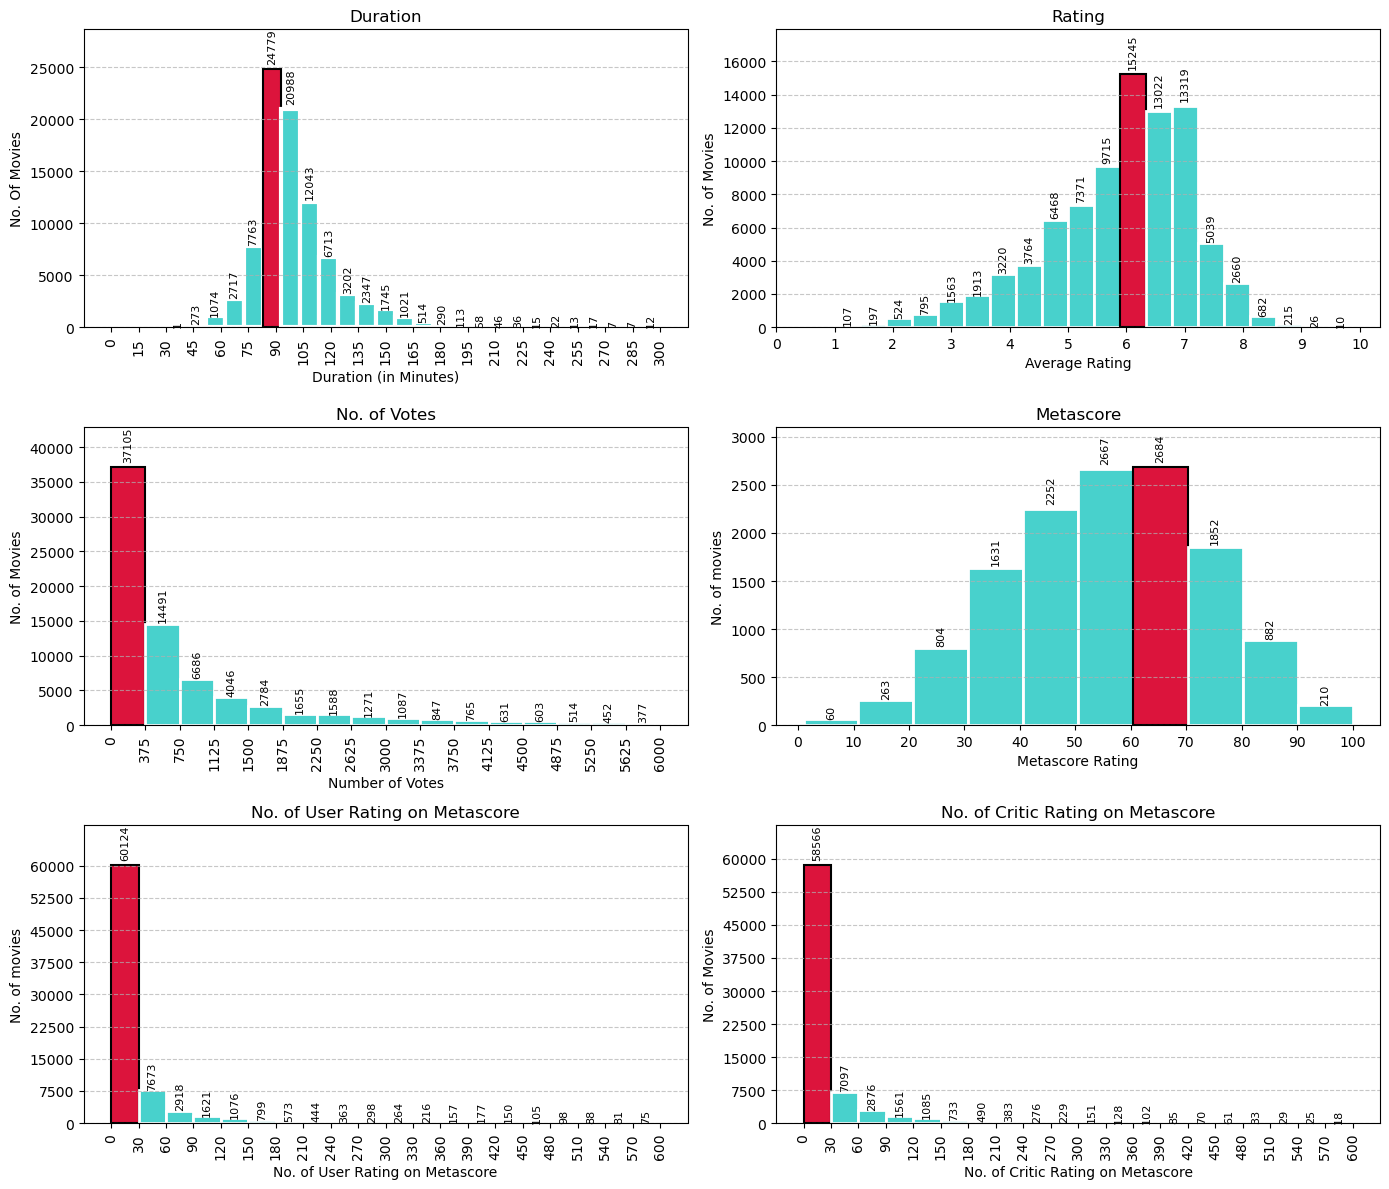

In [5]:
# Univariate Analysis Numerical columns
fig, axs = plt.subplots(3,2, figsize = (14,12)) # here we are creating a fig(where everything will be drawn) and it's axises which we will use to draw graphs at various position on this 'fig'. here it have capacity of drawing six graphs in 3 row and 2 column config and size will be 14 across x-axis and 12 across y-axis

#here we are taking values (i.e. count of items in each bin, frequency which each bar capture, patches i.e. bar itself) returned by hist() in respective variables
co, ba, pa = axs[0][0].hist(imdb_movies_data['duration'], bins = (np.linspace(0, 300, 30)), linewidth = 3, edgecolor = 'white', color = 'mediumturquoise')
axs[0][0].set_title('Duration') # then we are setting tittle for graph which will be printed on [0][0] position of 'fig' we created in 1st line
axs[0][0].set_xlabel('Duration (in Minutes)') # here we are setting label which will be shown on x-axis of graph printed on [0][0] location of 'fig'
axs[0][0].set_ylabel('No. Of Movies') # here we are setting label which will be shown on y-axis of graph printed on [0][0] location of 'fig'
axs[0][0].set_xticks(np.linspace(0, 300, 21)) # here we are explicitly setting ticks on x-axis according to a parameter i.e. 21 ticks spread linearly between 0 and 300
axs[0][0].tick_params(axis='x', rotation=90) # here we are using ticks_params to modify ticks on x-axis to look vertical instead of horizontal
axs[0][0].grid(axis='y', linestyle='--', alpha=0.7) # here we are adding a grid with values from y-axis

for c, p in zip(co, pa): # now we are using this loop to place a label of sort on top of each bin stating how many items lie in this bin or frequency by using co and pa we obtained when created hist()
  if c > 0: # we check if it's empty and if not
    axs[0][0].annotate(str(int(c)), xy = (p.get_x() + p.get_width() / 2, c + c / 50), ha = 'center', va = 'bottom', fontsize = 8, rotation=90) # we add this label using annotate() where, 1st(positional) para is the value which we want it to show i.e. count (we convert it to int to remove '.00' type values and then to string) and 2nd para is the xy location where we want the label to appear i.e. we get the x position using p.get_x() which gives us the x-coordinate of the patch or bar then we add into it the half of patches width to get it's center point and y position using count and add a value to it to not let the label overlap with the bar itself
current_ylim = axs[0][0].get_ylim() # here we are increasing the height (sort-of) of the graph as we have stated to use vertical labels above with rotation set to 90 label might go out of graph's spine or outer line which we increase using the get_ylim() and storing it's return value in current_ylim which cosist of two values 1st is bottom limit and 2nd is top limit
axs[0][0].set_ylim(current_ylim[0], current_ylim[1] * 1.1)  # here we actually increase the top limit by 10% while leaving the bottom limit unchanged

#here we use the np.argmax() to obtain the index of highest no. of items in count and then use it to modify the bar with highest count
max_index = np.argmax(co) # find index of the tallest bar
for i, p in enumerate(pa): # using this loop to get to the tallest bar or patch
    if i == max_index: # checking if the current bar is the tallest one and if it is
        p.set_facecolor('crimson') # then changing it's color
        p.set_edgecolor('black') # edge color
        p.set_linewidth(1.5)
# then we follow the same plan of action with all of the others or we can also create a function i.e. plot_hist(ax, data, title, xlabel, bins, xticks=None, yticks=None)
# note : i have specifically used np.linspace with bins in hist() and set_xticks or set_yticks to not let it include outliers in these graphs as there are some very extreme outliers (which i will treat at a latter stage) in almost every column of this data such as a movie with duration of nearly 800 minutes whereas average movie duration is 100 minutes but if your data don't contain such outliers and you don't want this level of control you can just skip them as they are optional parameters




# Grpah of IMdB rating
co, ba, pa = axs[0][1].hist(imdb_movies_data['avg_vote'], bins = 20, linewidth = 2, edgecolor = 'white', color = 'mediumturquoise')
axs[0][1].set_title('Rating')
axs[0][1].set_xlabel('Average Rating')
axs[0][1].set_ylabel('No. of Movies')
axs[0][1].set_xticks(np.linspace(0, 10, 11))
axs[0][1].grid(axis = 'y', linestyle='--', alpha=0.7)

for c, p in zip(co, pa):
  if c > 0:
    axs[0][1].annotate(str(int(c)), xy = (p.get_x() + p.get_width() / 2, c + c / 50), ha = 'center', va = 'bottom', fontsize = 8, rotation = 90)
current_ylim = axs[0][1].get_ylim()
axs[0][1].set_ylim(current_ylim[0], current_ylim[1] *1.12)

max_index = np.argmax(co)
for i, p in enumerate(pa):
  if i == max_index:
    p.set_facecolor('crimson')
    p.set_edgecolor('black')
    p.set_linewidth(1.5)




# Graph of no. of total votes recieved by movies
co, ba, pa = axs[1][0].hist(imdb_movies_data['votes'], bins = (np.linspace(0, 6000, 17)), linewidth = 2, edgecolor = 'white', color = 'mediumturquoise')
axs[1][0].set_title('No. of Votes')
axs[1][0].set_xlabel('Number of Votes')
axs[1][0].set_ylabel('No. of Movies')
axs[1][0].set_xticks(np.linspace(0, 6000, 17))
axs[1][0].tick_params(axis='x', rotation=90)
axs[1][0].grid(axis = 'y', linestyle = '--', alpha = 0.7)

for c, p in zip(co, pa):
  if c > 0:
    axs[1][0].annotate(str(int(c)), xy = (p.get_x() + p.get_width() / 2, c + c / 50), ha = 'center', va = 'bottom', rotation = 90, fontsize = 8)
current_ylim = axs[1][0].get_ylim()
axs[1][0].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax(co)
for i, p in enumerate(pa):
  if i == max_index:
    p.set_facecolor('crimson')
    p.set_edgecolor('black')
    p.set_linewidth(1.5)




# Graph of movies rating on metascore
co, ba, pa = axs[1][1].hist(imdb_movies_data['metascore'], bins = 10, linewidth = 2, edgecolor = 'white', color = 'mediumturquoise')
axs[1][1].set_title('Metascore')
axs[1][1].set_xlabel('Metascore Rating')
axs[1][1].set_ylabel('No. of movies')
axs[1][1].set_xticks(np.linspace(0, 100, 11))
axs[1][1].grid(axis = 'y', linestyle = '--', alpha = 0.7)

for c, p in zip(co, pa):
  if c > 0:
    axs[1][1].annotate(str(int(c)), xy = (p.get_x() + p.get_width() / 2, c + c / 50), ha = 'center', va = 'bottom', fontsize = 8, rotation = 90)
current_ylim = axs[1][1].get_ylim()
axs[1][1].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax(co)
for i, p in enumerate(pa):
  if i == max_index:
    p.set_facecolor('crimson')
    p.set_edgecolor('black')
    p.set_linewidth(1.5)




# Graph of no. of user rating on metascore
co, ba, pa = axs[2][0].hist(imdb_movies_data['reviews_from_users'], bins = (np.linspace(0, 600, 21)), linewidth = 2, edgecolor = 'white', color = 'mediumturquoise')
axs[2][0].set_title('No. of User Rating on Metascore')
axs[2][0].set_xlabel('No. of User Rating on Metascore')
axs[2][0].set_ylabel('No. of movies')
axs[2][0].set_xticks(np.linspace(0, 600, 21))
axs[2][0].set_yticks(np.linspace(0, 60000, 9))
axs[2][0].tick_params(axis='x', rotation=90)
axs[2][0].grid(axis = 'y', linestyle = '--', alpha = 0.7)

for c, p in zip(co, pa):
  if c > 0:
    axs[2][0].annotate(str(int(c)), xy = (p.get_x() + p.get_width() / 2, c + c / 50), ha = 'center', va = 'bottom', rotation = 90, fontsize = 8)
current_ylim = axs[2][0].get_ylim()
axs[2][0].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax(co)
for i, p in enumerate(pa):
  if i == max_index:
    p.set_facecolor('crimson')
    p.set_edgecolor('black')
    p.set_linewidth(1.5)




# Graph of no. of critics rating on metascore
co, ba, pa = axs[2][1].hist(imdb_movies_data['reviews_from_critics'], bins = np.linspace(0, 600, 21), linewidth = 2, edgecolor = 'white', color = 'mediumturquoise')
axs[2][1].set_title('No. of Critic Rating on Metascore')
axs[2][1].set_xlabel('No. of Critic Rating on Metascore')
axs[2][1].set_ylabel('No. of Movies')
axs[2][1].set_xticks(np.linspace(0, 600, 21))
axs[2][1].set_yticks(np.linspace(0, 60000, 9))
axs[2][1].tick_params(axis = 'x', rotation = 90)
axs[2][1].grid(axis = 'y', linestyle = '--', alpha = 0.7)

for c, p in zip(co, pa):
  if c > 0:
    axs[2][1].annotate(str(int(c)), xy = (p.get_x() + p.get_width() / 2, c + c / 50), ha = 'center', va = 'bottom', rotation = 90, fontsize = 8)
current_ylim = axs[2][1].get_ylim()
axs[2][1].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax(co)
for i, p in enumerate(pa):
  if i == max_index:
    p.set_facecolor('crimson')
    p.set_edgecolor('black')
    p.set_linewidth(1.5)




plt.tight_layout()
plt.show()

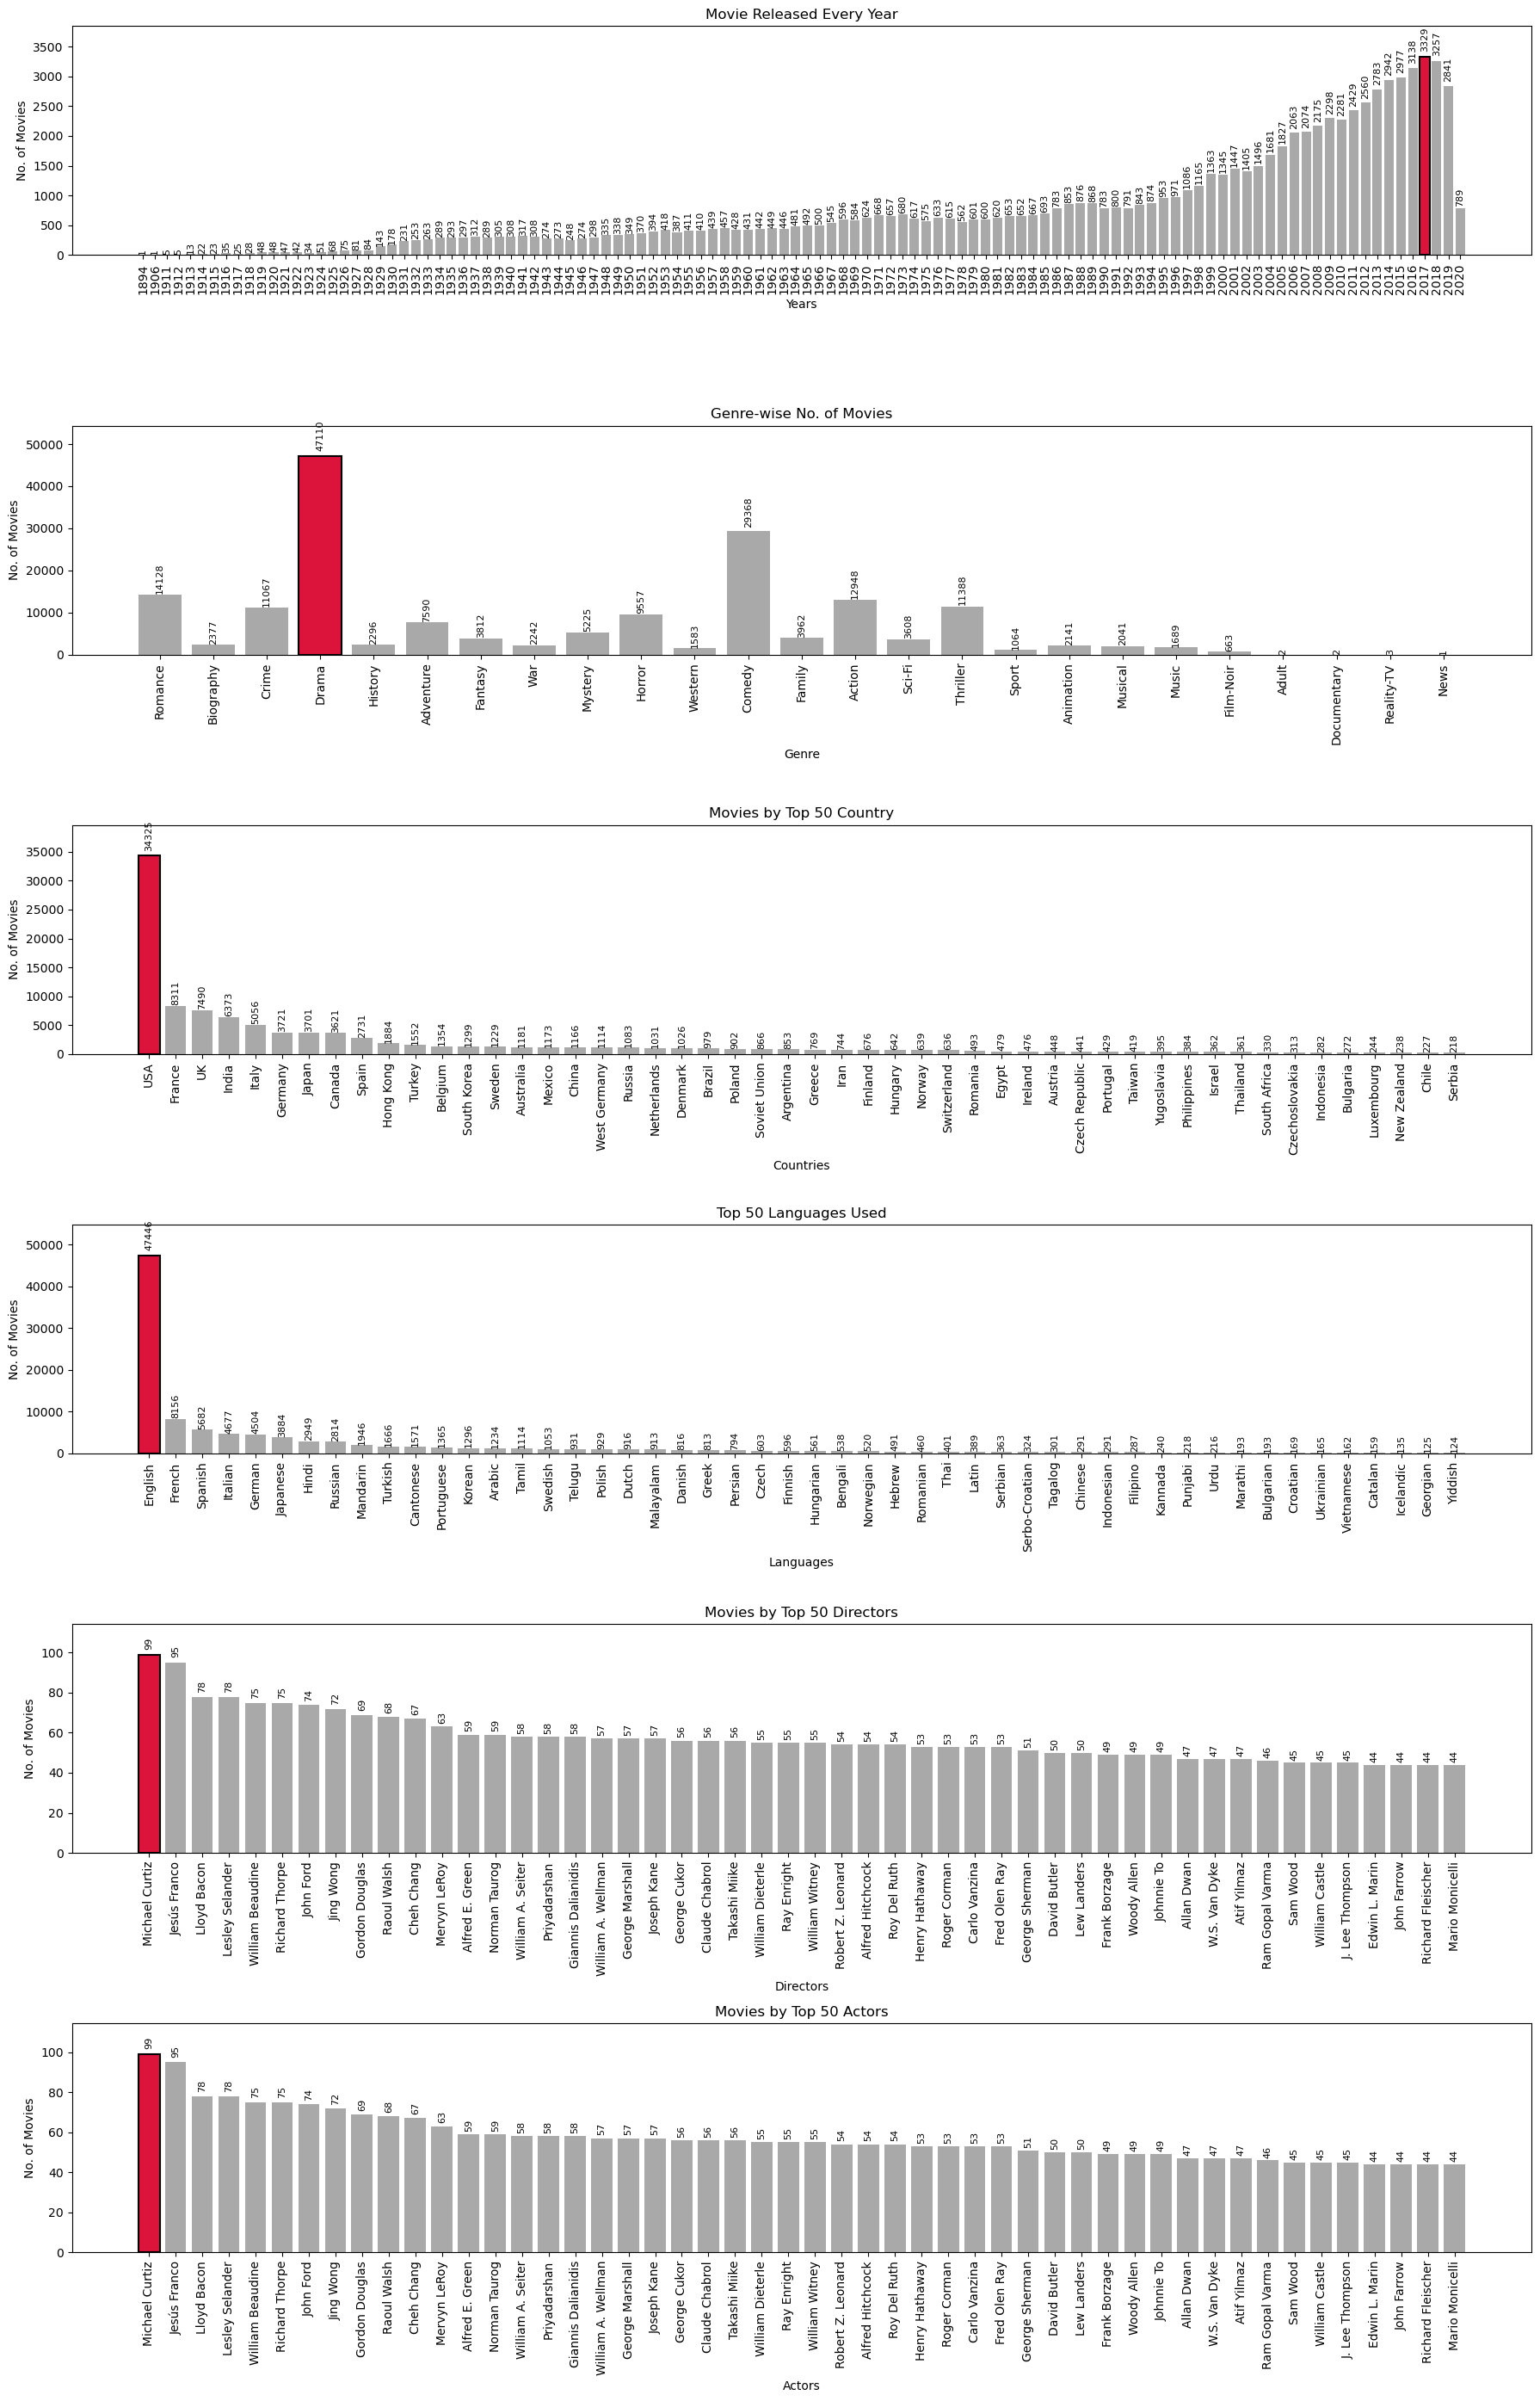

In [6]:
# Univariate Analysis Catagorical data
fig, axs = plt.subplots(6, figsize = (18, 28)) # again we are creating a figure with six positions where a graph can be drawn but this time in a single column

year_data = imdb_movies_data['year'].value_counts().sort_index().drop('TV Movie 2019') # this will give us key-values pairs where key will be unique year and value will be count of that year from 'year' column and then sort it descendingly
bars= axs[0].bar(year_data.index, year_data.values, color = 'darkgrey') # this will create a bar chart with years on x-axis and it's count on y-axis. a bar plot unilike a hist() return only one value which contain data of all the bars that can and have been used to customize bars behaviour
# axs[0].plot(year_data.index, year_data.values) # we can also draw a plot graph

#rest of the statements are same
axs[0].set_title('Movie Released Every Year')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('No. of Movies')
axs[0].tick_params(axis = 'x', rotation = 90)

for bar in bars: # using for loop to loop through each bar in the bar plot
  bar_height = bar.get_height() # this will give us height of a particular bar i.e. no of movies in that bar
  axs[0].annotate(bar_height, xy = (bar.get_x() + bar.get_width() / 2, bar_height + bar_height / 40), ha = 'center', va = 'bottom', rotation = 90, fontsize = 8)
current_ylim = axs[0].get_ylim()
axs[0].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax([bar.get_height() for bar in bars]) # here as we don't have direct access to count of various bars we use list comprehension to get the height of all bars in a list and then get the index of bar with max height
for i, bar in enumerate(bars):
  if i == max_index:
    bar.set_facecolor('crimson')
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)




# now here we are using a class of collection module and dict sub-module called 'Counter' which we imported earlier it is used to count number of occurance of multiple items
genre_count = Counter() # we create an empty Counter() instance
imdb_movies_data['genre'].dropna().apply(lambda x: genre_count.update([g.strip() for g in x.split(',')])) # here we first drop all null values of imdb_movies_data['genre'] and then apply a lambda function to it's values which first split the value whenever ',' is encountered and return the result in a list then we strip items of that list of any blankspaces and use list comprehension to directly add the striped item to a new list and then use that new list to update the count of items in Counter() instance
bars = axs[1].bar(genre_count.keys(), genre_count.values(), color = 'darkgrey')
axs[1].set_title('Genre-wise No. of Movies')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('No. of Movies')
axs[1].tick_params(axis = 'x', rotation = 90)

for bar in bars:
  bar_height = bar.get_height()
  axs[1].annotate(bar_height, xy = (bar.get_x() + bar.get_width() / 2, bar_height + bar_height / 40), ha = 'center', va = 'bottom', rotation = 90, fontsize = 8)
current_ylim = axs[1].get_ylim()
axs[1].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax([bar.get_height() for bar in bars])
for i, bar in enumerate(bars):
  if i == max_index:
    bar.set_facecolor('crimson')
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)




country_count = Counter()
imdb_movies_data['country'].dropna().apply(lambda x: country_count.update(g.strip() for g in x.split(',')))
bars = axs[2].bar(dict(country_count.most_common(50)).keys(), dict(country_count.most_common(50)).values(), color = 'darkgrey') # now since the number of countries in the dataset is too big we use a fuction of Counter() class - 'most_common(n)' which gives us top n items in a list so we convert it back into dict to use keys and values
axs[2].set_title('Movies by Top 50 Country')
axs[2].set_xlabel('Countries')
axs[2].set_ylabel('No. of Movies')
axs[2].tick_params(axis = 'x', rotation = 90)

for bar in bars:
  bar_height = bar.get_height()
  axs[2].annotate(bar_height, xy = (bar.get_x() + bar.get_width() / 2, bar_height + bar_height / 40), ha = 'center', va = 'bottom', fontsize = 8, rotation = 90)
current_ylim = axs[2].get_ylim()
axs[2].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax([bar.get_height() for bar in bars])
for i, bar in enumerate(bars):
  if i == max_index:
    bar.set_facecolor('crimson')
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)




# lang_count = Counter(imdb_movies_data['language'].dropna())
lang_count = Counter()
imdb_movies_data['language'].dropna().apply(lambda x: lang_count.update(g.strip() for g in x.split(',')))
bars = axs[3].bar(dict(lang_count.most_common(50)).keys(), dict(lang_count.most_common(50)).values(), color = 'darkgrey')
axs[3].set_title('Top 50 Languages Used')
axs[3].set_xlabel('Languages')
axs[3].set_ylabel('No. of Movies')
axs[3].tick_params(axis = 'x', rotation = 90)

for bar in bars:
  bar_height = bar.get_height()
  axs[3].annotate(bar_height, xy = (bar.get_x() + bar.get_width() / 2, bar_height + bar_height / 40), ha = 'center', va = 'bottom', fontsize = 8, rotation = 90)
current_ylim = axs[3].get_ylim()
axs[3].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax([bar.get_height() for bar in bars])
for i, bar in enumerate(bars):
  if i == max_index:
    bar.set_facecolor('crimson')
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)




director_count = Counter()
imdb_movies_data['director'].dropna().apply(lambda x: director_count.update(g.strip() for g in x.split(',')))
bars = axs[4].bar(dict(director_count.most_common(50)).keys(), dict(director_count.most_common(50)).values(), color = 'darkgrey')
axs[4].set_title('Movies by Top 50 Directors')
axs[4].set_xlabel('Directors')
axs[4].set_ylabel('No. of Movies')
axs[4].tick_params(axis = 'x', rotation = 90)

for bar in bars:
  bar_height = bar.get_height()
  axs[4].annotate(bar_height, xy = (bar.get_x() + bar.get_width() / 2, bar_height + bar_height / 40), ha = 'center', va = 'bottom', fontsize = 8, rotation = 90)
current_ylim = axs[4].get_ylim()
axs[4].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax([bar.get_height() for bar in bars])
for i, bar in enumerate(bars):
  if i == max_index:
    bar.set_facecolor('crimson')
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)




actor_count = Counter()
imdb_movies_data['director'].dropna().apply(lambda x: actor_count.update(g.strip() for g in x.split(',')))
bars = axs[5].bar(dict(actor_count.most_common(50)).keys(), dict(actor_count.most_common(50)).values(), color = 'darkgrey')
axs[5].set_title('Movies by Top 50 Actors')
axs[5].set_xlabel('Actors')
axs[5].set_ylabel('No. of Movies')
axs[5].tick_params(axis = 'x', rotation = 90)

for bar in bars:
  bar_height = bar.get_height()
  axs[5].annotate(bar_height, xy = (bar.get_x() + bar.get_width() / 2, bar_height + bar_height / 40), ha = 'center', va = 'bottom', fontsize = 8, rotation = 90)
current_ylim = axs[5].get_ylim()
axs[5].set_ylim(current_ylim[0], current_ylim[1] * 1.1)

max_index = np.argmax([bar.get_height() for bar in bars])
for i, bar in enumerate(bars):
  if i == max_index:
    bar.set_facecolor('crimson')
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)




plt.tight_layout()
plt.show()

In [7]:
# Data Cleaning

# i tried using df.explode() but it made an already large dataset an even larger and duplicacy is not even good for ML so then looked for hot-encoding or top-n which resulted in too many columns so now decided to just keep one of eac value in columns where there are multiple then we will use their box office to define their tier (one out of four) where null box office will be treated by using genre per country box office mean

# Index(['imdb_title_id', 'title', 'original_title', 'year','date_published','genre', 'duration', 'country', 'language', 'director', 'writer','production_company', 'actors', 'description', 'avg_vote', 'votes','budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore','reviews_from_users', 'reviews_from_critics'],dtype='object')

# we first copy the dataframe explicitly to insure no changes can affect the original dataframe
clean_imdb_movies_data = imdb_movies_data[imdb_movies_data['year'] != 'TV Movie 2019'].copy()

#here we drop columns we don't need and then rename the remaining ones as i see fit
clean_imdb_movies_data.drop(['imdb_title_id', 'title', 'original_title', 'description', 'metascore', 'reviews_from_users', 'reviews_from_critics'], axis = 1, inplace = True) # here i am droping columns that i don't currently need but will change these as to not drop column like 'genre' when moving toward ML as i can simple Hot-incode it
clean_imdb_movies_data.rename(columns={'date_published': 'Release Date','avg_vote' : 'IMDb Rating'}, inplace=True)
clean_imdb_movies_data.columns = [col.strip().title().replace('_', ' ') for col in clean_imdb_movies_data.columns]

# then we define this fuction which will return onlt the first item from a string which allow use to remove multiple values from columns like 'genre'
def only_first_item(data):
  if pd.isna(data):return data
  return data.split(',')[0].strip() if ',' in data else data.strip()

# now we will use the function we created to remove multiple values
clean_imdb_movies_data['Single Genre'] = clean_imdb_movies_data['Genre'].apply(only_first_item)
clean_imdb_movies_data['Director'] = clean_imdb_movies_data['Director'].apply(only_first_item)
clean_imdb_movies_data['Writer'] = clean_imdb_movies_data['Writer'].apply(only_first_item)
clean_imdb_movies_data['Single Country'] = clean_imdb_movies_data['Country'].apply(only_first_item)
clean_imdb_movies_data['Single Language'] = clean_imdb_movies_data['Language'].apply(only_first_item)
clean_imdb_movies_data['Actor 1'] = clean_imdb_movies_data['Actors'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) and ',' in x else (x.strip() if isinstance(x, str) else x))
clean_imdb_movies_data['Actor 2'] = clean_imdb_movies_data['Actors'].apply(lambda x: x.split(',')[1].strip() if isinstance(x, str) and ',' in x else (x.strip() if isinstance(x, str) else x))
clean_imdb_movies_data.drop('Actors', axis = 1, inplace =True)

# now we will convert some cat data to numerical as to analyse them better
clean_imdb_movies_data['Year'] = pd.to_numeric(clean_imdb_movies_data['Year'])
clean_imdb_movies_data['Release Date'] = pd.to_datetime(clean_imdb_movies_data['Release Date'], format='mixed', errors='coerce')

# now for budget and income as these contain symbols so we can't just directly convert them into numerical form
def moey_handle(data):
  if pd.isnull(data):return data
  cleaned = ''.join(char for char in data if char.isdigit())
  return cleaned if cleaned else None

# first we will remove any currncy sign
clean_imdb_movies_data['Budget'] = clean_imdb_movies_data['Budget'].apply(moey_handle)
clean_imdb_movies_data['Usa Gross Income'] = clean_imdb_movies_data['Usa Gross Income'].apply(moey_handle)
clean_imdb_movies_data['Worlwide Gross Income'] = clean_imdb_movies_data['Worlwide Gross Income'].apply(moey_handle)

# then we will convert it into numerical form
clean_imdb_movies_data['Budget'] = pd.to_numeric(clean_imdb_movies_data['Budget'])
clean_imdb_movies_data['Usa Gross Income'] = pd.to_numeric(clean_imdb_movies_data['Usa Gross Income'])
clean_imdb_movies_data['Worlwide Gross Income'] = pd.to_numeric(clean_imdb_movies_data['Worlwide Gross Income'])

clean_imdb_movies_data

,Year,Release Date,Genre,Duration,Country,Language,Director,Writer,Production Company,Imdb Rating,Votes,Budget,Usa Gross Income,Worlwide Gross Income,Single Genre,Single Country,Single Language,Actor 1,Actor 2
0,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,5.9,154,NaN,NaN,NaN,Romance,USA,NaN,Blanche Bayliss,William Courtenay
1,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,6.1,589,2250.0,NaN,NaN,Biography,Australia,NaN,Elizabeth Tait,John Tait
2,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,Urban Gad,Fotorama,5.8,188,NaN,NaN,NaN,Drama,Germany,NaN,Asta Nielsen,Valdemar Psilander
3,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,5.2,446,45000.0,NaN,NaN,Drama,USA,English,Helen Gardner,Pearl Sindelar
4,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,Francesco Bertolini,Dante Alighieri,Milano Film,7.0,2237,NaN,NaN,NaN,Adventure,Italy,Italian,Salvatore Papa,Arturo Pirovano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,Alexandre Coquelle,Monkey Pack Films,5.3,398,NaN,NaN,3507171.0,Comedy,France,French,Dany Boon,Philippe Katerine
85851,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,Radek Bajgar,Johan Nijenhuis & Co,7.7,724,NaN,NaN,7299062.0,Comedy,Netherlands,German,Herman Finkers,Johanna ter Steege
85852,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,Vineesh Aaradya,RMCC Productions,7.9,265,NaN,NaN,NaN,Drama,India,Malayalam,Anoop Chandran,Indrans
85853,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,Ahmet Faik Akinci,Gizem Ajans,6.4,194,NaN,NaN,2833.0,Drama,Turkey,Turkish,Ahmet Faik Akinci,Belma Mamati


In [8]:
# Function to get Country-wise Genre-specific Averages
def get_country_genre_specific_average(df, column_name):
  '''Takes the DataFrame and specific column name from that dataset then find the country-wise genre-specific mean for all possible combination in case when mean can\'t be found it will use the country mean as the fallback value

  Returns: A dictionary containing (country,genre) as keys and their mean as values'''

  genre_list = df['Single Genre'].unique()
  country_list = df['Single Country'].unique()
  average_dict = dict()

  for country in country_list:
    country_mean = df.loc[df['Single Country'] == country, column_name].mean()
    for genre in genre_list:
      average_income = df.loc[(df['Single Country'] == country) & (df['Single Genre'] == genre), column_name].mean()

      if pd.notna(average_income):
        average_dict[(country, genre)] = int(round(average_income))
      elif pd.notna(country_mean):
        average_dict[(country, genre)] = int(round(country_mean))
      else:
        average_dict[(country, genre)] = np.nan

  return average_dict

In [9]:
# Fuction to fill the missing values using Country-wise Genre-specific income mean
def fill_na_values(df, column_name, average_dict):
  '''
    Fills missing values in a specified column using the country-genre average
    values provided in the average_dict.

    Modifies the DataFrame in place.
    '''
  genre_list = df['Single Genre'].unique()
  country_list = df['Single Country'].unique()
  for country in country_list:
    for genre in genre_list:
      df.loc[(df['Single Country'] == country) & (df['Single Genre'] == genre), column_name] = df.loc[(df['Single Country'] == country) & (df['Single Genre'] == genre), column_name].fillna(average_dict.get((country, genre), np.nan))  # it will use np.nan if key is not found as suggest by GPT

In [10]:
# Function Calls
average_dic_for_worlwide_income = get_country_genre_specific_average(clean_imdb_movies_data, 'Worlwide Gross Income')
fill_na_values(clean_imdb_movies_data, 'Worlwide Gross Income', average_dic_for_worlwide_income)
average_dic_for_usa_income = get_country_genre_specific_average(clean_imdb_movies_data, 'Usa Gross Income')
fill_na_values(clean_imdb_movies_data, 'Usa Gross Income', average_dic_for_usa_income)
average_dic_for_budget = get_country_genre_specific_average(clean_imdb_movies_data, 'Budget')
fill_na_values(clean_imdb_movies_data, 'Budget', average_dic_for_budget)

In [11]:
clean_imdb_movies_data['Worlwide Gross Income'].isnull().sum(), clean_imdb_movies_data['Usa Gross Income'].isnull().sum(), clean_imdb_movies_data['Budget'].isnull().sum()

(np.int64(207), np.int64(799), np.int64(136))

In [12]:
clean_imdb_movies_data.loc[clean_imdb_movies_data['Worlwide Gross Income'].isnull()]

,Year,Release Date,Genre,Duration,Country,Language,Director,Writer,Production Company,Imdb Rating,Votes,Budget,Usa Gross Income,Worlwide Gross Income,Single Genre,Single Country,Single Language,Actor 1,Actor 2
6299,1949,1950-02-09,"Drama, History",80,East Germany,German,Wolfgang Staudte,Erwin Klein,Deutsche Film (DEFA),7.3,298,3750000.0,NaN,NaN,Drama,East Germany,German,Paul Esser,Irene Korb
6534,1950,1950-12-08,"Family, Fantasy, Romance",106,East Germany,German,Paul Verhoeven,Wilhelm Hauff,Deutsche Film (DEFA),7.4,508,3200000.0,NaN,NaN,Family,East Germany,German,Lutz Moik,Hanna Rucker
6619,1950,1950-05-12,History,110,East Germany,German,Kurt Maetzig,Philipp Gecht,Deutsche Film (DEFA),6.8,106,3750000.0,NaN,NaN,History,East Germany,German,Paul Bildt,Fritz Tillmann
6748,1951,1951-05-11,Drama,110,East Germany,German,Falk Harnack,Hans Robert Bortfeld,Deutsche Film (DEFA),7.1,147,3750000.0,NaN,NaN,Drama,East Germany,German,Erwin Geschonneck,Käthe Braun
7062,1951,1951-08-31,"Comedy, Drama",109,East Germany,German,Wolfgang Staudte,Heinrich Mann,Deutsche Film (DEFA),7.3,749,3750000.0,NaN,NaN,Comedy,East Germany,German,Werner Peters,Paul Esser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85320,2020,2020-05-01,"Action, Crime, Mystery",78,NaN,English,Jesse D. Ikeman,Geoff Hart,PurpleDOG,4.2,180,NaN,NaN,NaN,Action,NaN,English,William Forsythe,Kathleen Munroe
85492,2019,2019-11-01,Drama,114,NaN,Bengali,Indraadip Dasgupta,NaN,Kaleidoscope Entertainment Presents,7.1,158,NaN,NaN,NaN,Drama,NaN,Bengali,Bidipta Chakraborty,Kaushik Ganguly
85608,2019,2019-03-10,Documentary,76,NaN,NaN,Julie Smith Clem,NaN,Left/Right,7.1,112,NaN,NaN,NaN,Documentary,NaN,NaN,Michael Ian Black,Wyatt Cenac
85685,2019,2020-02-12,Drama,103,"Sudan, France, Egypt, Germany, Norway, Qatar",Arabic,Amjad Abu Alala,Amjad Abu Alala,Andolfi,7.2,788,10.0,NaN,NaN,Drama,Sudan,Arabic,Islam Mubarak,Mustafa Shehata


In [13]:
clean_imdb_movies_data = clean_imdb_movies_data.dropna(subset=['Worlwide Gross Income', 'Usa Gross Income', 'Budget'])
clean_imdb_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85036 entries, 0 to 85854
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   85036 non-null  int64         
 1   Release Date           85036 non-null  datetime64[ns]
 2   Genre                  85036 non-null  object        
 3   Duration               85036 non-null  int64         
 4   Country                85035 non-null  object        
 5   Language               84170 non-null  object        
 6   Director               84958 non-null  object        
 7   Writer                 83494 non-null  object        
 8   Production Company     80655 non-null  object        
 9   Imdb Rating            85036 non-null  float64       
 10  Votes                  85036 non-null  int64         
 11  Budget                 85036 non-null  float64       
 12  Usa Gross Income       85036 non-null  float64       
 13  Worlwi

In [14]:
# As we can see there are still some missing values so let's treaet them

# Country - one value missing
clean_imdb_movies_data.loc[clean_imdb_movies_data['Country'].isnull(), 'Country'] = 'USA'
clean_imdb_movies_data.loc[clean_imdb_movies_data['Single Country'].isnull(), 'Single Country'] = 'USA' # this will replace the NaN in country to ''USA' as the movie is american(googled it)
clean_imdb_movies_data.loc[(clean_imdb_movies_data['Single Country']=='USA') & (clean_imdb_movies_data['Director']=='Richard Grieco')] # can use this to verify it's correctly imputed

# Language - multiple values missing
country_lang_mode = dict() # i made this loop then GPT suggested to use this lambda fuction
for country in clean_imdb_movies_data['Single Country'].unique():
  country_lang_mode[country] = clean_imdb_movies_data.loc[clean_imdb_movies_data['Single Country']== country, 'Single Language'].mode()[0]

# for country in clean_imdb_movies_data['Country'].unique():
#   clean_imdb_movies_data.loc[(clean_imdb_movies_data['Country'] == country) & (clean_imdb_movies_data['Language'].isnull()), 'Language'] = country_lang_mode[country]

clean_imdb_movies_data.loc[:, 'Language'] = clean_imdb_movies_data.apply(lambda row: country_lang_mode[row['Single Country']] if pd.isnull(row['Single Language']) else row['Single Language'],axis=1)
clean_imdb_movies_data.loc[:, 'Single Language'] = clean_imdb_movies_data.apply(lambda row: country_lang_mode[row['Single Country']] if pd.isnull(row['Single Language']) else row['Single Language'],axis=1)

# now only remaining columns with missing values are 'Director', 'Writer', 'Production Company' and 'Actor 1 & 2'
mask = (clean_imdb_movies_data['Actor 1'].isnull() |
        clean_imdb_movies_data['Actor 2'].isnull() |
        clean_imdb_movies_data['Director'].isnull() |
        clean_imdb_movies_data['Production Company'].isnull() |
        clean_imdb_movies_data['Writer'].isnull())

columns = ['Actor 1',
           'Actor 2',
           'Director',
           'Production Company',
           'Writer']

clean_imdb_movies_data.loc[mask, columns] = clean_imdb_movies_data.loc[mask, columns].fillna('Missing')
clean_imdb_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85036 entries, 0 to 85854
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year                   85036 non-null  int64         
 1   Release Date           85036 non-null  datetime64[ns]
 2   Genre                  85036 non-null  object        
 3   Duration               85036 non-null  int64         
 4   Country                85036 non-null  object        
 5   Language               85036 non-null  object        
 6   Director               85036 non-null  object        
 7   Writer                 85036 non-null  object        
 8   Production Company     85036 non-null  object        
 9   Imdb Rating            85036 non-null  float64       
 10  Votes                  85036 non-null  int64         
 11  Budget                 85036 non-null  float64       
 12  Usa Gross Income       85036 non-null  float64       
 13  Worlwi

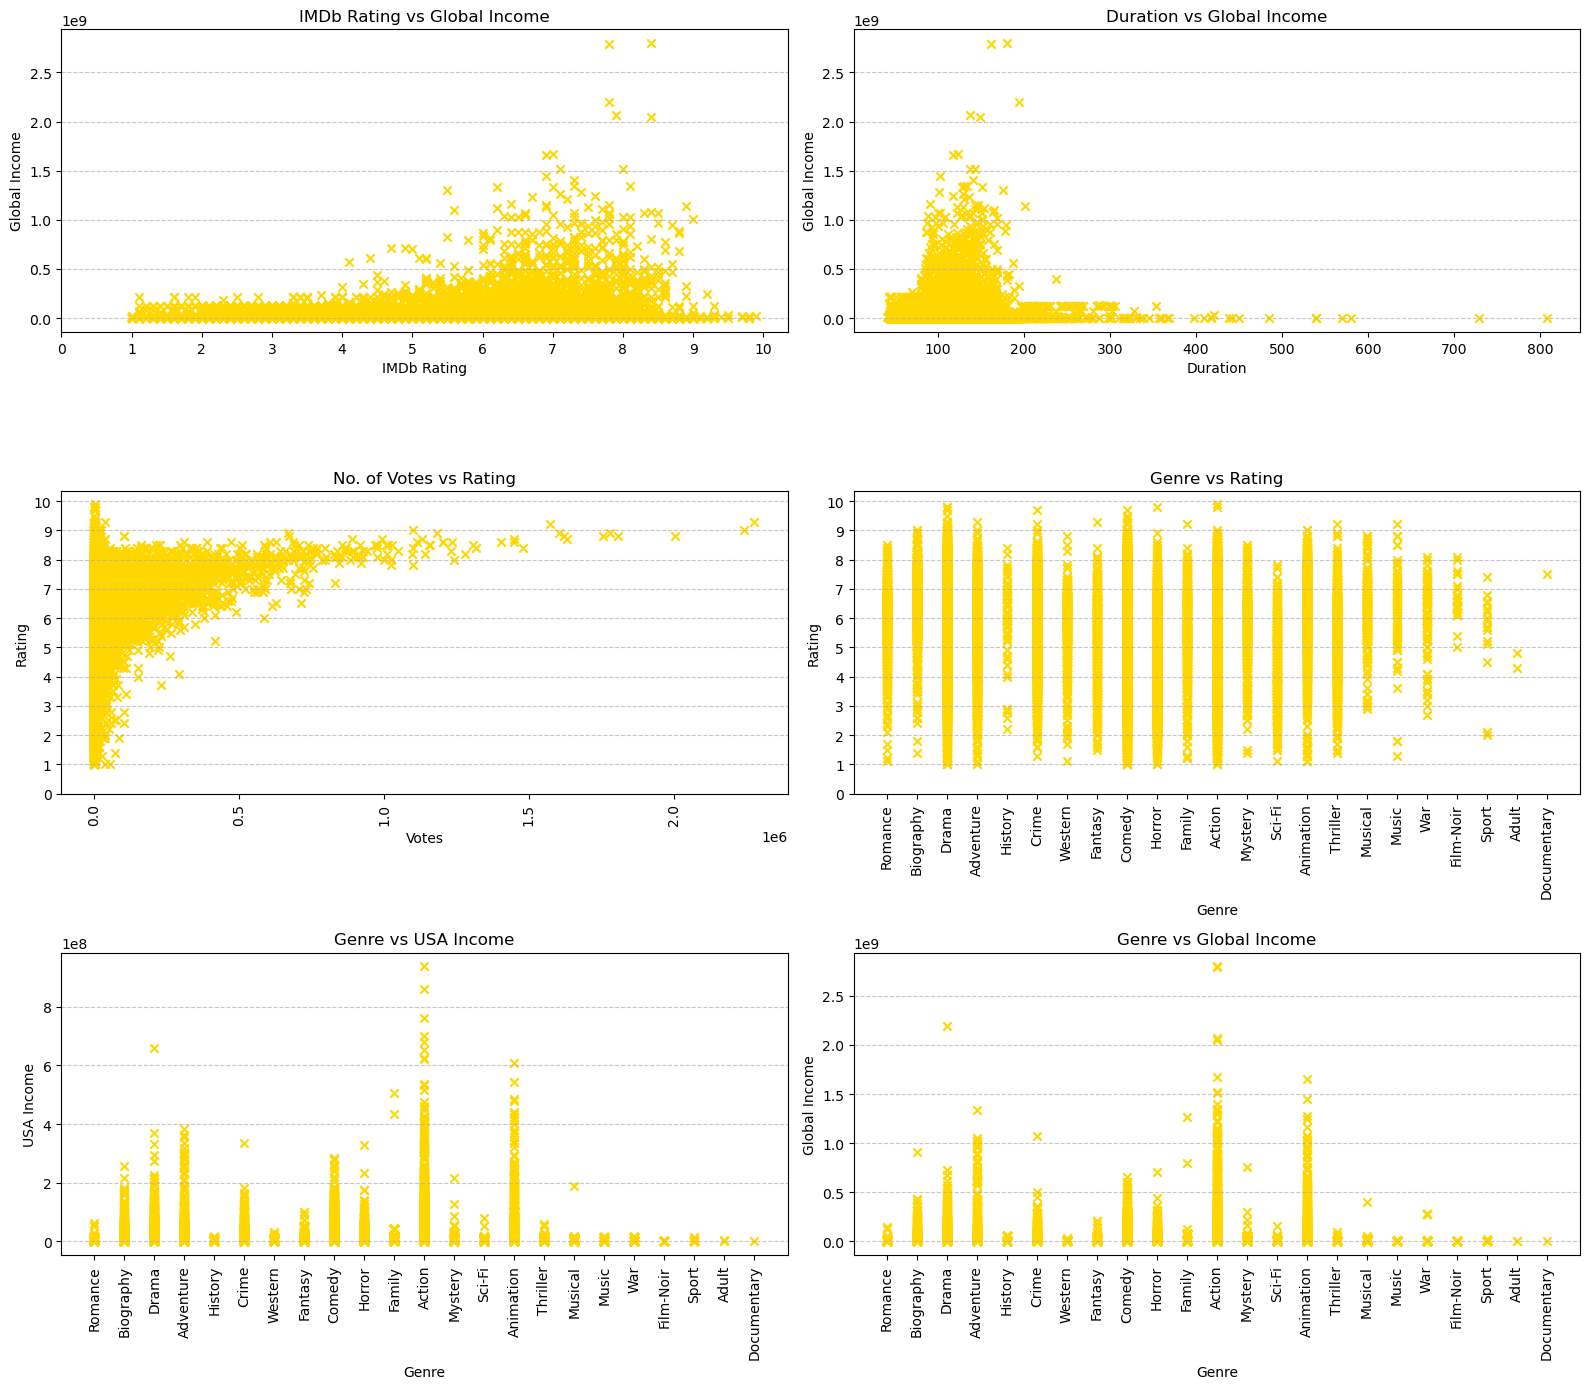

In [15]:
# Biavariate Analysis

fig, axs = plt.subplots(3,2, figsize = (16, 14))

# Numarical vs Numarical
axs[0][0].scatter(clean_imdb_movies_data['Imdb Rating'], clean_imdb_movies_data['Worlwide Gross Income'], color = 'gold', marker = 'x')
axs[0][0].set_title('IMDb Rating vs Global Income')
axs[0][0].set_xlabel('IMDb Rating')
axs[0][0].set_ylabel('Global Income')
axs[0][0].set_xticks(np.linspace(0, 10, 11))
axs[0][0].grid(axis = 'y', linestyle = '--', alpha = 0.7)


axs[0][1].scatter(clean_imdb_movies_data['Duration'], clean_imdb_movies_data['Worlwide Gross Income'], color = 'gold', marker = 'x')
axs[0][1].set_title('Duration vs Global Income')
axs[0][1].set_xlabel('Duration')
axs[0][1].set_ylabel('Global Income')
axs[0][1].grid(axis = 'y', linestyle = '--', alpha = 0.7)


axs[1][0].scatter(clean_imdb_movies_data['Votes'], clean_imdb_movies_data['Imdb Rating'], color = 'gold', marker = 'x')
axs[1][0].set_title('No. of Votes vs Rating')
axs[1][0].set_xlabel('Votes')
axs[1][0].set_ylabel('Rating')
axs[1][0].grid(axis = 'y', linestyle = '--', alpha = 0.7)
axs[1][0].set_yticks(np.linspace(0, 10, 11))
axs[1][0].tick_params(axis = 'x', rotation = 90)


# Categorical vs Numerical
axs[1][1].scatter(clean_imdb_movies_data['Single Genre'], clean_imdb_movies_data['Imdb Rating'], color = 'gold', marker = 'x')
axs[1][1].set_title('Genre vs Rating')
axs[1][1].set_xlabel('Genre')
axs[1][1].set_ylabel('Rating')
axs[1][1].grid(axis = 'y', linestyle = '--', alpha = 0.7)
axs[1][1].set_yticks(np.linspace(0, 10, 11))
axs[1][1].tick_params(axis = 'x', rotation = 90)


axs[2][0].scatter(clean_imdb_movies_data['Single Genre'], clean_imdb_movies_data['Usa Gross Income'], color = 'gold', marker = 'x')
axs[2][0].set_title('Genre vs USA Income')
axs[2][0].set_xlabel('Genre')
axs[2][0].set_ylabel('USA Income')
axs[2][0].grid(axis = 'y', linestyle = '--', alpha = 0.7)
axs[2][0].tick_params(axis = 'x', rotation = 90)


# axs[2][1].boxplot(clean_imdb_movies_data['Genre'], clean_imdb_movies_data['Worlwide Gross Income'])
axs[2][1].scatter(clean_imdb_movies_data['Single Genre'], clean_imdb_movies_data['Worlwide Gross Income'], color = 'gold', marker = 'x')
axs[2][1].set_title('Genre vs Global Income')
axs[2][1].set_xlabel('Genre')
axs[2][1].set_ylabel('Global Income')
axs[2][1].grid(axis = 'y', linestyle = '--', alpha = 0.7)
axs[2][1].tick_params(axis = 'x', rotation = 90)


plt.tight_layout()
plt.show()

In [16]:
# Featue Engineering


# Release Date ----------------------------------------------------------------------------------------------------------------------------------------------------------
clean_imdb_movies_data.loc[:, 'Release Month'] = clean_imdb_movies_data.loc[:, 'Release Date'].dt.month
clean_imdb_movies_data.loc[:, 'Release Quater'] = clean_imdb_movies_data.loc[:, 'Release Date'].dt.quarter
clean_imdb_movies_data.loc[:, 'Release DayofWeek'] = clean_imdb_movies_data.loc[:, 'Release Date'].dt.dayofweek

def prime_time(date):
  if date.month in [12, 11]:return True
  else: return False
clean_imdb_movies_data.loc[:, 'Prime Time For Release'] = clean_imdb_movies_data.loc[:, 'Release Date'].apply(prime_time).astype(int)


# Country ----------------------------------------------------------------------------------------------------------------------------------------------------------
country_count = dict(clean_imdb_movies_data['Country'].apply(lambda x: x.split(',') if pd.notna(x) else  x).explode().str.strip().value_counts()) # we will use the values in this dictionary to replace the names of country which are not in top 30 to other so we can multi-hot encode it
country_count_counter = Counter(country_count)
country_count_to_compare = list(dict(country_count_counter.most_common(30)).values())

# def country_top_30(items):
#   return [item if country_count.get(item, 0) in country_count_to_compare else 'Other' for item in items]
# clean_imdb_movies_data.loc[:, 'Country'] = clean_imdb_movies_data['Country'].apply(lambda x: [country.strip() for country in x.split(',')] if pd.notna(x) else x).apply(country_top_30).apply(lambda x: ','.join(x))

clean_imdb_movies_data.loc[:, 'Country'] = clean_imdb_movies_data.loc[:, 'Country'].apply(lambda x: ','.join([item if country_count.get(item.strip(), 0) in country_count_to_compare else 'Other' for item in x.split(',')]) if pd.notna(x) else x) # a much more refined version given by GPT


# Language --------------------------------------------------------------------------------------------------------------------------------------------------------------
lang_count = dict(clean_imdb_movies_data['Language'].apply(lambda x: x.split(',') if pd.notna(x) else  x).explode().str.strip().value_counts()) # we will use the values in this dictionary to replace the languages which are not in top 30 to other so we can multi-hot encode it
lang_count_counter = Counter(lang_count)
lang_count_to_compare = list(dict(lang_count_counter.most_common(24)).values())
lang_count_to_compare

# def lang_top_24(items):
#   return [item if lang_count.get(item, 0) in lang_count_to_compare else 'Other' for item in items]
# clean_imdb_movies_data.loc[:, 'Language'] = clean_imdb_movies_data['Language'].apply(lambda x: [lang.strip() for lang in x.split(',')] if pd.notna(x) else x).apply(lang_top_24).apply(lambda x: ','.join(x))

clean_imdb_movies_data.loc[:, 'Language'] = clean_imdb_movies_data.loc[:, 'Language'].apply(lambda x: ','.join([item if lang_count.get(item.strip(), 0) in lang_count_to_compare else 'Other' for item in x.split(',')]) if pd.notna(x) else x)


# Func for Director, Writer, Actor --------------------------------------------------------------------------------------------------------------------------------------

# First used this
# global_box_avg = clean_imdb_movies_data['Worlwide Gross Income'].mean()
# def tier_getter(item, dict_for_compare):
#   if item in dict_for_compare.keys() and dict_for_compare[item] is not None:
#     if dict_for_compare[item] > global_box_avg * 1.3:
#       return 'Tier 1'
#     elif global_box_avg * 1.3 >= dict_for_compare[item] >= global_box_avg / 0.3:
#       return 'Tier 2'
#     else:
#       return 'Tier 3'
#   else:
#     return 'Tier 4'

# Then found about this through Stack and GPT
def tier_getter(score, quantile):
  if score >= quantile[0.95]:
    return 'Tier 1'
  elif quantile[0.95] > score >= quantile[0.75]:
    return 'Tier 2'
  elif quantile[0.75] > score >= quantile[0.5]:
    return 'Tier 3'
  elif quantile[0.5] > score >= quantile[0.25]:
    return 'Tier 4'
  else:
    return 'Tier 5'


# Director --------------------------------------------------------------------------------------------------------------------------------------------------------------

# director_success = dict()
# for director, count in clean_imdb_movies_data['Director'].value_counts().items():
#   if count > 5:
#     dir_avg_income = round(clean_imdb_movies_data.loc[(clean_imdb_movies_data['Director'] == director), 'Worlwide Gross Income'].mean(), 2)
#     dir_avg_budget = round(clean_imdb_movies_data.loc[(clean_imdb_movies_data['Director'] == director), 'Budget'].mean(), 2)
#     dir_profit = dir_avg_income - dir_avg_budget
#     director_success[director] = round(dir_profit, 2)

# clean_imdb_movies_data.loc[:, 'Director Tier'] = clean_imdb_movies_data.loc[:, 'Director'].apply(lambda x: tier_getter(x, director_success))

director_stats = clean_imdb_movies_data.groupby('Director').agg(
  Imdb_Rating_mean=('Imdb Rating', 'mean'),
  Director_count=('Director', 'count'),
  Worldwide_Gross_Income_sum=('Worlwide Gross Income', 'sum'),
  Worldwide_Gross_Income_mean=('Worlwide Gross Income', 'mean')).reset_index() # here we first get different stats related to every directors

director_stats['Score'] = (0.35 * director_stats['Director_count'] + 0.2 * director_stats['Imdb_Rating_mean'] + 0.3 * director_stats['Worldwide_Gross_Income_mean'] + 0.15 * director_stats['Worldwide_Gross_Income_sum']) # then we assing weight's to each variable according to what we think is important

quantile = director_stats['Score'].quantile([0.25, 0.5, 0.75, 0.95]) # then we divide the score in 5 quantiles i.e. 0-0.25, 0.25-0.5, 0.5-0.75, 0.75-0.9, 0.9-1
director_stats['Tier'] = director_stats['Score'].apply(lambda x : tier_getter(x, quantile)) # then we get tier of each unique director using function we created

dir_tier_dict = dict(zip(director_stats['Director'], director_stats['Tier'])) # then we create a dictionary consisting of 'Director' and it's 'Tier'
clean_imdb_movies_data.loc[:, 'Director Tier'] = clean_imdb_movies_data['Director'].map(dir_tier_dict) # then we map that dictonary as to create a new column in clean_imdb_movies_data named 'Director Tier' which will contain tier of each 80k+ data points


# Actor 1 ---------------------------------------------------------------------------------------------------------------------------------------------------------------
# actor_1_success = dict()
# for actor, count in clean_imdb_movies_data['Actor 1'].value_counts().items():
#   if count > 5:
#     actor_avg_income = round(clean_imdb_movies_data.loc[(clean_imdb_movies_data['Actor 1'] == actor), 'Worlwide Gross Income'].mean(), 2)
#     actor_avg_budget = round(clean_imdb_movies_data.loc[(clean_imdb_movies_data['Actor 1'] == actor), 'Budget'].mean(), 2)
#     actor_profit = actor_avg_income - actor_avg_budget
#     actor_1_success[actor] = round(actor_profit, 2)

# clean_imdb_movies_data.loc[:, 'Actor 1'] = clean_imdb_movies_data.loc[:, 'Actor 1'].apply(lambda x: tier_getter(x, actor_1_success))

actor_1_stats = clean_imdb_movies_data.groupby('Actor 1').agg(
  Imdb_Rating_mean=('Imdb Rating', 'mean'),
  Actor_1_count=('Director', 'count'),
  Worldwide_Gross_Income_sum=('Worlwide Gross Income', 'sum'),
  Worldwide_Gross_Income_mean=('Worlwide Gross Income', 'mean')).reset_index()

actor_1_stats['Score'] = (0.35 * actor_1_stats['Actor_1_count'] + 0.2 * actor_1_stats['Imdb_Rating_mean'] + 0.3 * actor_1_stats['Worldwide_Gross_Income_mean'] + 0.15 * actor_1_stats['Worldwide_Gross_Income_sum'])

quantile = actor_1_stats['Score'].quantile([0.25, 0.5, 0.75, 0.95])
actor_1_stats['Tier'] = actor_1_stats['Score'].apply(lambda x : tier_getter(x, quantile))

act_1_tier_dict = dict(zip(actor_1_stats['Actor 1'], actor_1_stats['Tier']))
clean_imdb_movies_data.loc[:, 'Actor 1 Tier'] = clean_imdb_movies_data['Actor 1'].map(act_1_tier_dict)


# Actor 2 ---------------------------------------------------------------------------------------------------------------------------------------------------------------
# actor_2_success = dict()
# for actor, count in clean_imdb_movies_data['Actor 2'].value_counts().items():
#   if count > 5:
#     actor_avg_income = round(clean_imdb_movies_data.loc[(clean_imdb_movies_data['Actor 2'] == actor), 'Worlwide Gross Income'].mean(), 2)
#     actor_avg_budget = round(clean_imdb_movies_data.loc[(clean_imdb_movies_data['Actor 2'] == actor), 'Budget'].mean(), 2)
#     actor_profit = actor_avg_income - actor_avg_budget
#     actor_2_success[actor] = round(actor_profit, 2)

# clean_imdb_movies_data.loc[:, 'Actor 2'] = clean_imdb_movies_data.loc[:, 'Actor 2'].apply(lambda x: tier_getter(x, actor_2_success))

actor_2_stats = clean_imdb_movies_data.groupby('Actor 2').agg(
  Imdb_Rating_mean=('Imdb Rating', 'mean'),
  Actor_2_count=('Director', 'count'),
  Worldwide_Gross_Income_sum=('Worlwide Gross Income', 'sum'),
  Worldwide_Gross_Income_mean=('Worlwide Gross Income', 'mean')).reset_index()

actor_2_stats['Score'] = (0.35 * actor_2_stats['Actor_2_count'] + 0.2 * actor_2_stats['Imdb_Rating_mean'] + 0.3 * actor_2_stats['Worldwide_Gross_Income_mean'] + 0.15 * actor_2_stats['Worldwide_Gross_Income_sum'])

quantile = actor_2_stats['Score'].quantile([0.25, 0.5, 0.75, 0.95])
actor_2_stats['Tier'] = actor_2_stats['Score'].apply(lambda x : tier_getter(x, quantile))

act_2_tier_dict = dict(zip(actor_2_stats['Actor 2'], actor_2_stats['Tier']))
clean_imdb_movies_data.loc[:, 'Actor 2 Tier'] = clean_imdb_movies_data['Actor 2'].map(act_2_tier_dict)


# Writer ----------------------------------------------------------------------------------------------------------------------------------------------------------------
# writer_success = dict()
# for writer, count in clean_imdb_movies_data['Writer'].value_counts().items():
#   if count > 5:
#     writer_avg_income = round(clean_imdb_movies_data.loc[(clean_imdb_movies_data['Writer'] == writer), 'Worlwide Gross Income'].mean(), 2)
#     writer_avg_budget = round(clean_imdb_movies_data.loc[(clean_imdb_movies_data['Writer'] == writer), 'Budget'].mean(), 2)
#     writer_profit = writer_avg_income - writer_avg_budget
#     writer_success[writer] = round(writer_profit, 2)

# clean_imdb_movies_data.loc[:, 'Writer Tier'] = clean_imdb_movies_data.loc[:, 'Writer'].apply(lambda x: tier_getter(x, writer_success))


writer_stats = clean_imdb_movies_data.groupby('Writer').agg(
  Imdb_Rating_mean=('Imdb Rating', 'mean'),
  Writer_count=('Director', 'count'),
  Worldwide_Gross_Income_sum=('Worlwide Gross Income', 'sum'),
  Worldwide_Gross_Income_mean=('Worlwide Gross Income', 'mean')).reset_index()

writer_stats['Score'] = (0.35 * writer_stats['Writer_count'] + 0.2 * writer_stats['Imdb_Rating_mean'] + 0.3 * writer_stats['Worldwide_Gross_Income_mean'] + 0.15 * writer_stats['Worldwide_Gross_Income_sum'])

quantile = writer_stats['Score'].quantile([0.25, 0.5, 0.75, 0.95])
writer_stats['Tier'] = writer_stats['Score'].apply(lambda x : tier_getter(x, quantile))

writer_tier_dict = dict(zip(writer_stats['Writer'], writer_stats['Tier']))
clean_imdb_movies_data.loc[:, 'Writer Tier'] = clean_imdb_movies_data['Writer'].map(writer_tier_dict)

C:\Users\nothi\AppData\Local\Temp\ipykernel_9940\3109908231.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_imdb_movies_data.loc[:, 'Release Month'] = clean_imdb_movies_data.loc[:, 'Release Date'].dt.month
C:\Users\nothi\AppData\Local\Temp\ipykernel_9940\3109908231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_imdb_movies_data.loc[:, 'Release Quater'] = clean_imdb_movies_data.loc[:, 'Release Date'].dt.quarter
C:\Users\nothi\AppData\Local\Temp\ipykernel_9940\3109908231.py:7: SettingWith

In [17]:
clean_imdb_movies_data.drop(['Release Date', 'Writer', 'Director','Actor 1','Actor 2', 'Production Company', 'Single Genre', 'Single Country', 'Single Language'], axis = 1, inplace = True)

C:\Users\nothi\AppData\Local\Temp\ipykernel_9940\3073775686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_imdb_movies_data.drop(['Release Date', 'Writer', 'Director','Actor 1','Actor 2', 'Production Company', 'Single Genre', 'Single Country', 'Single Language'], axis = 1, inplace = True)


In [18]:
# Scaling

scaled_data = clean_imdb_movies_data.copy()
num_columns = scaled_data.select_dtypes(include = ['int', 'float']).columns
print(num_columns)
rs = RobustScaler()
for col in num_columns:
  scaled_data[col] = rs.fit_transform(scaled_data[[col]])

scaled_data

Index(['Year', 'Duration', 'Imdb Rating', 'Votes', 'Budget',
       'Usa Gross Income', 'Worlwide Gross Income', 'Release Month',
       'Release Quater', 'Release DayofWeek', 'Prime Time For Release'],
      dtype='object')


,Year,Genre,Duration,Country,Language,Imdb Rating,Votes,Budget,Usa Gross Income,Worlwide Gross Income,Release Month,Release Quater,Release DayofWeek,Prime Time For Release,Director Tier,Actor 1 Tier,Actor 2 Tier,Writer Tier
0,-3.176471,Romance,-2.55,USA,English,-0.1250,-0.211125,-0.292476,0.117149,0.107265,0.571429,0.666667,-1.5,0.0,Tier 3,Tier 3,Tier 3,Tier 3
1,-2.823529,"Biography, Crime, Drama",-1.30,Australia,English,0.0000,0.063843,-0.384408,0.431054,0.387908,0.857143,0.666667,-1.0,1.0,Tier 3,Tier 3,Tier 3,Tier 3
2,-2.676471,Drama,-2.15,"Germany, Denmark",German,-0.1875,-0.189633,-0.177312,0.130467,-0.076730,0.285714,0.333333,0.5,0.0,Tier 4,Tier 3,Tier 4,Tier 4
3,-2.647059,"Drama, History",0.20,USA,English,-0.5625,-0.026549,-0.382945,0.657480,0.776088,0.714286,0.666667,-1.0,1.0,Tier 3,Tier 3,Tier 3,Tier 3
4,-2.676471,"Adventure, Drama, Fantasy",-1.40,Italy,Italian,0.5625,1.105563,32.866781,-0.044441,-0.186484,-0.428571,-0.333333,-2.0,0.0,Tier 4,Tier 4,Tier 4,Tier 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,0.529412,Comedy,-0.05,"France, Belgium",French,-0.5000,-0.056890,0.083179,-0.079345,-0.111392,-0.714286,-0.333333,-1.0,0.0,Tier 4,Tier 2,Tier 4,Tier 3
85851,0.529412,"Comedy, Drama",0.35,Netherlands,German,1.0000,0.149178,-0.314702,-0.139024,0.057070,-0.571429,-0.333333,-0.5,0.0,Tier 3,Tier 3,Tier 4,Tier 4
85852,0.500000,Drama,1.70,India,Malayalam,1.1250,-0.140961,2.052150,-0.131236,-0.014080,-0.428571,-0.333333,0.0,0.0,Tier 4,Tier 4,Tier 4,Tier 4
85853,0.500000,"Drama, Family",0.10,Turkey,Turkish,0.1875,-0.185841,-0.294548,-0.175050,-0.267080,-0.428571,-0.333333,0.0,0.0,Tier 5,Tier 5,Tier 5,Tier 5


In [19]:
# Encoding

scaled_data['Genre_list'] = scaled_data['Genre'].fillna('Unknown').str.split(r',\s*')
scaled_data['Country_list'] = scaled_data['Country'].fillna('Unknown').str.split(r',\s*')
scaled_data['Language_list'] = scaled_data['Language'].fillna('Unknown').str.split(r',\s*')

genre_mlb = MultiLabelBinarizer()
genre_df = pd.DataFrame(genre_mlb.fit_transform(scaled_data['Genre_list']), columns=[f"Genre_{g}" for g in genre_mlb.classes_], index=scaled_data.index)

country_mlb = MultiLabelBinarizer()
country_df = pd.DataFrame(country_mlb.fit_transform(scaled_data['Country_list']), columns=[f"Country_{g}" for g in country_mlb.classes_], index=scaled_data.index)

lang_mlb = MultiLabelBinarizer()
lang_df = pd.DataFrame(lang_mlb.fit_transform(scaled_data['Language_list']), columns=[f"Language_{g}" for g in lang_mlb.classes_], index=scaled_data.index)

dir_mlb = MultiLabelBinarizer(classes = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5'])
dir_df = pd.DataFrame(dir_mlb.fit_transform(scaled_data['Director Tier'].apply(lambda x: [x])), columns=[f"Director_{g}" for g in dir_mlb.classes_], index=scaled_data.index)

act_1_mlb = MultiLabelBinarizer(classes = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5'])
act_1_df = pd.DataFrame(act_1_mlb.fit_transform(scaled_data['Actor 1 Tier'].apply(lambda x: [x])), columns=[f"Actor_1_{g}" for g in act_1_mlb.classes_], index=scaled_data.index)

act_2_mlb = MultiLabelBinarizer(classes = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5'])
act_2_df = pd.DataFrame(act_2_mlb.fit_transform(scaled_data['Actor 2 Tier'].apply(lambda x: [x])), columns=[f"Actor_2_{g}" for g in act_2_mlb.classes_], index=scaled_data.index)

writer_mlb = MultiLabelBinarizer(classes = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5'])
writer_df = pd.DataFrame(writer_mlb.fit_transform(scaled_data['Writer Tier'].apply(lambda x: [x])), columns=[f"Writer_{g}" for g in writer_mlb.classes_], index=scaled_data.index)

genre_df.columns, country_df.columns, lang_df.columns, dir_df.columns, act_1_df.columns, act_2_df.columns, writer_df.columns

(Index(['Genre_Action', 'Genre_Adult', 'Genre_Adventure', 'Genre_Animation',
        'Genre_Biography', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary',
        'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_Film-Noir',
        'Genre_History', 'Genre_Horror', 'Genre_Music', 'Genre_Musical',
        'Genre_Mystery', 'Genre_News', 'Genre_Reality-TV', 'Genre_Romance',
        'Genre_Sci-Fi', 'Genre_Sport', 'Genre_Thriller', 'Genre_War',
        'Genre_Western'],
       dtype='object'),
 Index(['Country_Argentina', 'Country_Australia', 'Country_Belgium',
        'Country_Brazil', 'Country_Canada', 'Country_China', 'Country_Denmark',
        'Country_Finland', 'Country_France', 'Country_Germany',
        'Country_Greece', 'Country_Hong Kong', 'Country_Hungary',
        'Country_India', 'Country_Iran', 'Country_Italy', 'Country_Japan',
        'Country_Mexico', 'Country_Netherlands', 'Country_Norway',
        'Country_Other', 'Country_Poland', 'Country_Russia',
        'Country_S

In [20]:
# Merging all DataFrames and dropping unnecessery columns

encoded_data = pd.concat([scaled_data, genre_df, lang_df, country_df, dir_df, act_1_df, act_2_df, writer_df], axis = 1).drop(['Genre', 'Country', 'Language', 'Director Tier', 'Actor 1 Tier', 'Actor 2 Tier', 'Writer Tier', 'Genre_list', 'Country_list', 'Language_list'], axis = 1)
with pd.option_context('display.max_info_columns', 200):
    encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85036 entries, 0 to 85854
Data columns (total 112 columns):
 #    Column                  Non-Null Count  Dtype  
---   ------                  --------------  -----  
 0    Year                    85036 non-null  float64
 1    Duration                85036 non-null  float64
 2    Imdb Rating             85036 non-null  float64
 3    Votes                   85036 non-null  float64
 4    Budget                  85036 non-null  float64
 5    Usa Gross Income        85036 non-null  float64
 6    Worlwide Gross Income   85036 non-null  float64
 7    Release Month           85036 non-null  float64
 8    Release Quater          85036 non-null  float64
 9    Release DayofWeek       85036 non-null  float64
 10   Prime Time For Release  85036 non-null  float64
 11   Genre_Action            85036 non-null  int64  
 12   Genre_Adult             85036 non-null  int64  
 13   Genre_Adventure         85036 non-null  int64  
 14   Genre_Animation         8

In [21]:
temp_data = encoded_data.copy()

In [25]:
# Transformation

scaler = PowerTransformer()
final_data = pd.DataFrame(scaler.fit_transform(temp_data), columns = temp_data.columns)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(final_data.head(5))

       Year  Duration  Imdb Rating     Votes    Budget  Usa Gross Income  \
0 -2.138776 -4.403635    -0.142733 -0.989042 -0.983082         -0.002643   
1 -2.037770 -1.900040     0.028691 -0.194538 -1.330932          0.598692   
2 -1.991654 -3.536759    -0.224668 -0.911444 -0.610727          0.031079   
3 -1.982113  0.178528    -0.674335 -0.410873 -1.325024          0.869195   
4 -1.991654 -2.077228     0.934473  0.936915  1.996626         -0.502857   

   Worlwide Gross Income  Release Month  Release Quater  Release DayofWeek  \
0               0.017959       1.011937        1.298355          -1.443291   
1               0.492984       1.562134        1.298355          -0.883440   
2              -0.460269       0.460863        0.491569           1.313454   
3               0.891655       1.287135        1.298355          -0.883440   
4              -0.840530      -0.921823       -1.282819          -1.958124   

   Prime Time For Release  Genre_Action  Genre_Adult  Genre_Adventure  \
0

In [30]:
# Cheking skewness before and after transformation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(final_data.skew(), encoded_data.skew(), sep = '\n')

Year                       -0.176005
Duration                   -0.126952
Imdb Rating                 0.025082
Votes                       0.691891
Budget                      0.526735
Usa Gross Income            0.423691
Worlwide Gross Income       0.391082
Release Month              -0.011762
Release Quater             -0.020877
Release DayofWeek           0.027646
Prime Time For Release      1.857484
Genre_Action                1.945835
Genre_Adult               206.195296
Genre_Adventure             2.892268
Genre_Animation             6.070961
Genre_Biography             5.759256
Genre_Comedy                0.661760
Genre_Crime                 2.208757
Genre_Documentary         291.609328
Genre_Drama                -0.189283
Genre_Family                4.346487
Genre_Fantasy               4.422820
Genre_Film-Noir            11.192484
Genre_History               5.912440
Genre_Horror                2.461617
Genre_Music                 6.899884
Genre_Musical               6.243192
G

In [31]:
# Exporting Final Data

final_data.to_csv('/Jupyter/Temp/Final Data.csv')

In [37]:
# Spliting the data into train and test part

x= final_data.drop('Worlwide Gross Income', axis = 1)
y = final_data['Worlwide Gross Income']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, final_data.shape

((63777, 111), (63777,), (21259, 111), (21259,), (85036, 112))

In [38]:
# Exporting Training and Testing Data seperately

x_train.to_csv('/Jupyter/Temp/X_Train.csv')
x_test.to_csv('/Jupyter/Temp/X_Test.csv')
y_train.to_csv('/Jupyter/Temp/Y_Train.csv')
y_test.to_csv('/Jupyter/Temp/Y_Test.csv')

In [19]:
clean_imdb_movies_data.describe(include='all')

,Year,Genre,Duration,Country,Language,Imdb Rating,Votes,Budget,Usa Gross Income,Worlwide Gross Income,Release Month,Release Quater,Release DayofWeek,Prime Time For Release,Director Tier,Actor 1 Tier,Actor 2 Tier,Writer Tier
count,85036.000000,85036,85036.000000,85036,85036,85036.000000,8.503600e+04,8.503600e+04,8.503600e+04,8.503600e+04,85036.000000,85036.000000,85036.000000,85036.000000,85036,85036,85036,85036
unique,NaN,1254,NaN,3185,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5
top,NaN,Drama,NaN,USA,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tier 2,Tier 2,Tier 2,Tier 2
freq,NaN,12323,NaN,28511,43192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20877,20980,21807,20912
mean,1993.380439,NaN,100.329884,NaN,NaN,5.892593,9.578292e+03,1.596958e+08,1.202646e+07,2.289992e+07,6.337151,2.461781,3.236018,0.159744,NaN,NaN,NaN,NaN
std,24.253686,NaN,22.557226,NaN,NaN,1.234050,5.382446e+04,2.079470e+09,2.474706e+07,6.043951e+07,3.619196,1.161214,1.452249,0.366371,NaN,NaN,NaN,NaN
min,1894.000000,NaN,41.000000,NaN,NaN,1.000000,9.900000e+01,0.000000e+00,3.000000e+01,1.000000e+00,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1979.000000,NaN,88.000000,NaN,NaN,5.200000,2.060000e+02,3.532829e+06,5.819712e+05,9.744890e+05,3.000000,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN
50%,2002.000000,NaN,96.000000,NaN,NaN,6.100000,4.880000e+02,1.122975e+07,3.027594e+06,6.014480e+06,6.000000,2.000000,4.000000,0.000000,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,108.000000,NaN,NaN,6.800000,1.788000e+03,3.274004e+07,1.688601e+07,2.348332e+07,10.000000,4.000000,4.000000,0.000000,NaN,NaN,NaN,NaN


In [20]:
clean_imdb_movies_data.info(), clean_imdb_movies_data.select_dtypes(include = 'number').skew()

<class 'pandas.core.frame.DataFrame'>
Index: 85036 entries, 0 to 85854
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    85036 non-null  int64  
 1   Genre                   85036 non-null  object 
 2   Duration                85036 non-null  int64  
 3   Country                 85036 non-null  object 
 4   Language                85036 non-null  object 
 5   Imdb Rating             85036 non-null  float64
 6   Votes                   85036 non-null  int64  
 7   Budget                  85036 non-null  float64
 8   Usa Gross Income        85036 non-null  float64
 9   Worlwide Gross Income   85036 non-null  float64
 10  Release Month           85036 non-null  int32  
 11  Release Quater          85036 non-null  int32  
 12  Release DayofWeek       85036 non-null  int32  
 13  Prime Time For Release  85036 non-null  int64  
 14  Director Tier           85036 non-null  obj

(None,
 Year                      -1.050214
 Duration                   3.098903
 Imdb Rating               -0.761786
 Votes                     14.550802
 Budget                    80.481850
 Usa Gross Income           8.735520
 Worlwide Gross Income     12.150443
 Release Month             -0.008188
 Release Quater             0.040536
 Release DayofWeek         -0.495846
 Prime Time For Release     1.857484
 dtype: float64)

In [ ]:
# # Group the data by Genre and Country, and get IMDb ratings i.e. making boxplot using matplotlib
# grouped_data = clean_imdb_movies_data[['Genre', 'Country', 'Imdb Rating']].dropna()

# # Pivot the data: create a DataFrame where rows are genres, columns are countries, and values are IMDb ratings
# pivot_data = grouped_data.pivot_table(index='Genre', columns='Country', values='Imdb Rating', aggfunc=lambda x: list(x))

# # Prepare the data for plotting (convert the DataFrame to a list of lists for boxplot)
# data_for_boxplot = []
# labels = []

# # Loop over each genre and get the IMDb ratings for all country combinations
# for genre in pivot_data.index:
#     genre_data = []

#     # Loop through each country and collect the IMDb ratings
#     for country in pivot_data.columns:
#         genre_country_data = pivot_data.loc[genre, country]

#         # Ensure genre_country_data is a non-empty list before appending
#         if isinstance(genre_country_data, list) and len(genre_country_data) > 0:
#             genre_data.extend(genre_country_data)  # Flatten the list of IMDb ratings into genre_data

#     if genre_data:  # Only append if there are valid ratings
#         data_for_boxplot.append(genre_data)
#         labels.append(genre)

# # Create the boxplot
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.boxplot(data_for_boxplot, tick_labels=labels)

# # Customize the plot
# ax.set_title('IMDb Rating by Genre and Country')
# ax.set_xlabel('Genre')
# ax.set_ylabel('IMDb Rating')
# ax.set_xticklabels(labels, rotation=45, ha='right')

# # Adjust layout for better visibility
# plt.tight_layout()
# plt.show()

In [ ]:
#how to make a graph for year wise each genre movies number